<h1 style="font-family:'Times New Roman', Times, serif;color: blue;font-size: 30px; ">ML Classification: Predicting 5-Year Career Longevity for NBA Rookies</h1>


<h2>What are classification models?</h2>

<p style="text-align:justify;text-justify:inter-word">A classification model draws some sort of conclusion from observed values. Given one or more inputs(features) a classification model will try to predict the value of one or more outcomes. Outcomes are labels that can be applied to a dataset. For example,  spam filtering, either ‘Spam’ or ‘Not Spam’ based on text of email, sender or IP.</p>

<p style="text-align:justify;text-justify:inter-word">Two approaches to machine learning: Supervised and Unsupervised. In a Supervised model, a training dataset is fed into the classification algorithm (general rule of thumb is 80% is training data, and 20% is test data).That lets the model know what is, for example, “authorized” transactions. Then the test data sample is compared with that to determine if there is a “fraudulent” transaction. This type of learning falls under “Classification”.</p>

<p style="text-align:justify;text-justify:inter-word">Unsupervised models are fed a dataset that is not labeled and looks for clusters of data points. It can be used to detect patterns or identify outliers within a dataset. A typical use case would be finding similar images. Unsupervised models can also be used to find “fraudulent” transactions by looking for anomalies within a dataset. This type of learning falls under “Clustering.”</p>

<p style="text-align:justify;text-justify:inter-word">here are a number of classification models. Classification models include logistic regression, decision tree, random forest, gradient-boosted tree, multilayer perceptron, one-vs-rest, and Naive Bayes.</p>



<h2>Importing required tools</h2>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

C:\Users\chidanand\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h2>Understanding and Analysing the data</h2>

In [2]:
data = pd.read_csv('NBA_test.csv') #reading csv file
data.head(10) #print first 10 attributes

,GP,MIN,PTS,FGM,FGA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,TAR
0,36,27.4,7.4,2.6,7.6,1.6,2.3,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,2.6,3.4,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,0.9,1.3,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,0.9,1.3,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,1.3,1.9,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,75,11.4,3.7,1.5,3.5,0.4,0.5,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,62,10.9,6.6,2.5,5.8,1.5,1.8,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,48,10.3,5.7,2.3,5.4,0.7,0.8,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,65,9.9,2.4,1.0,2.4,0.4,0.5,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,42,8.5,3.7,1.4,3.5,1.0,1.4,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


<p style="text-align:justify;text-justify:inter-word">In general, variables (and data) either represent measurements on some continuous scale, or they represent information about some categorical or discrete characteristics.</p>

<p style="text-align:justify;text-justify:inter-word">For example, the weight, height, and age of respondents in a survey would represent continuous variables; in industrial or medical applications, survival/failure times are also continuous variables. However, a person's gender, occupation, or marital status are categorical or discrete variables: either a person is male or female, never married, married, or divorced, etc.</p>

<p style="text-align:justify;text-justify:inter-word">Some variables could be considered in either way. For example, a person's rating of someone else's attractiveness on a 4 point scale may be considered a continuous variable, or we may consider it a discrete variable with 4 categories.</p>

<p style="text-align:justify;text-justify:inter-word">In this data set there is a total of 21 features:</p>
<ul style="text-align:justify;text-justify:inter-word">
<p style="text-align:justify;text-justify:inter-word">
<ol>
<li>Name------Name</li>
<li>GP--------Games Plyed</li>
<li>MIN-------MinutesPlayed</li>
<li>PTS-------PointsPerGame</li>
<li>FGM-------FieldGoalsMade</li>
<li>FGA-------FieldGoalAttempts</li>
<li>FG%-------FieldGoalPercent</li>
<li>3P Made---3PointersMade</li>
<li>3PA-------3PointersAttempts</li>
<li>3P%-------3PointersPercent</li>
<li>FTM-------FreeThrowMade</li>
<li>FTA-------FreeThrowAttemptes</li>
<li>FT%-------FreeThrowPercent</li>
<li>OREB------OffenciveRebounds</li>
<li>DREB------DefensiveRebounds</li>
<li>REB-------Rebounds</li>
<li>AST-------Assists</li>
<li>STL-------Steals</li>
<li>BLK-------Blocks</li>
<li>TOV-------Turnovers</li>
<li>TAR-------Target</li>
</ol>

<p style="text-align:justify;text-justify:inter-word">out of these 21 features, 20 are continuous and the remaining one is discrete(TAR)</p>

<h2>Feature Selection</h2>
<p style="text-align:justify;text-justify:inter-word">The features which are have high correlation values are selected to train the model</p>
<p style="text-align:justify;text-justify:inter-word">A better explanation for feature selection based on correlation can be referred <a href="https://towardsdatascience.com/data-correlation-can-make-or-break-your-machine-learning-project-82ee11039cc9">here</a> </p>


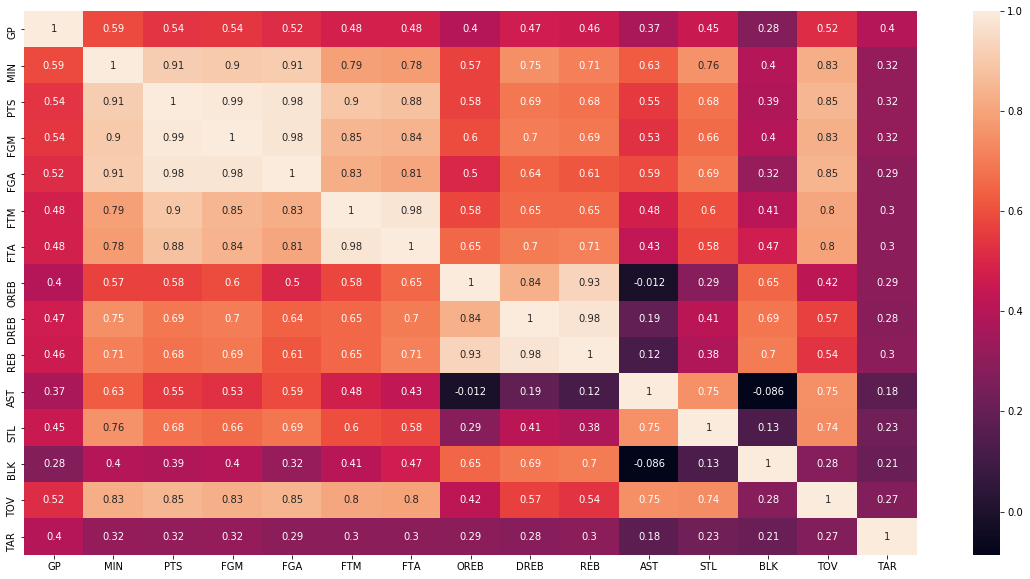

In [3]:
#Correlation between attributes
corr = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

<h2>Preprocessing of the dataset</h2>
<p style="text-align:justify;text-justify:inter-word">Features which have low correlation values are dropped to decrease bias and improve variance of the model</p>

In [4]:
target = data["TAR"] #seperating target from data
data = data.drop(["TAR","AST","STL","BLK","TOV"],axis=1) #removing features
data.head(5)

,GP,MIN,PTS,FGM,FGA,FTM,FTA,OREB,DREB,REB
0,36,27.4,7.4,2.6,7.6,1.6,2.3,0.7,3.4,4.1
1,35,26.9,7.2,2.0,6.7,2.6,3.4,0.5,2.0,2.4
2,74,15.3,5.2,2.0,4.7,0.9,1.3,0.5,1.7,2.2
3,58,11.6,5.7,2.3,5.5,0.9,1.3,1.0,0.9,1.9
4,48,11.5,4.5,1.6,3.0,1.3,1.9,1.0,1.5,2.5


<h3>Splitting and Normalizing Data</h3>
<p style="text-align:justify;text-justify:inter-word">Data normalization is the process of rescaling one or more attributes to the range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0.</p>
<p style="text-align:justify;text-justify:inter-word">The need for normalization of data can be better understood <a href="https://medium.com/@lahorekid/a-dummies-guide-to-data-normalization-for-neural-nets-ff1998116e75">here</a></p>


In [5]:
#Splitting data into test and train

xtrain, xtest, ytrain, ytest = train_test_split(data,target,test_size=0.3)
xtest = xtest.values      #test data
ytrain = ytrain.values    #test target
xtrain = xtrain.values    #train data
ytest = ytest.values      #train target


#Normalizing test and train Data

xtrain = (xtrain-xtrain.min()) / (xtrain.max()-xtrain.min())
xtest = (xtest-xtest.min()) / (xtest.max()-xtest.min())

<h2>Defining the Model</h2>

<p style="text-align:justify;text-justify:inter-word">In this example, a <a href="https://theclevermachine.wordpress.com/2014/09/11/a-gentle-introduction-to-artificial-neural-networks/">neural network</a> is used to train the model. A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input so the network generates the best possible result without needing to redesign the output criteria.Other<a href="https://medium.com/@sifium/machine-learning-types-of-classification-9497bd4f2e14"> ML algorithms</a> which can do classification.</p>

<p style="text-align:justify;text-justify:inter-word">In this example, the neural network consists of 3 layers
	<ul>
		<li>Layer1  -  Input layer(19 nodes)</li>
		<li>Layer2  - Hidden layer(8 nodes)</li>
		<li>Layer3  - Output layer(2 nodes)</li>
	</ul>
</p>

<p style="text-align:justify;text-justify:inter-word">As the data set is small consisting around 1400 attributes I decided to have only one hidden layer. There is no specific reason to choose 19 and 8 nodes in input and hidden layer since the output is binary (0 or 1) the output layer is having 2 nodes. To get a better idea of layers and node selection refer to this <a href="https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/"> article</a>. Tanh is used as an <a href="https://www.geeksforgeeks.org/activation-functions-neural-networks/">activation function</a> for the input and the hidden layer while the <a href="https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d">softmax function</a> is used for the output layer. The reason for using  Tanh and softmax function was it gave a better <a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9">accuracy</a> while compared to other activation functions(trial and error).</p>



In [6]:
model = keras.models.Sequential([
            keras.layers.Dense(19, activation=tf.nn.tanh, input_shape=(xtrain[0].shape), kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dense(8, activation=tf.nn.tanh),
            keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.SGD(0.001),
             metrics=['accuracy'])

<h2>Training the model</h2>
<p style="text-align:justify;text-justify:inter-word">To train the model we use <a href="https://www.geeksforgeeks.org/cross-validation-machine-learning/">cross-validation</a> method where dataset is divided into smaller parts and then the model is trained. Cross-validation is done to reduce <a href="https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/">bias</a> and <a href="https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/">variance</a> in the model.</p>

In [27]:
history = model.fit(xtrain, ytrain, epochs=7, validation_split=0.2, verbose=2)

Train on 750 samples, validate on 188 samples
Epoch 1/7
 - 0s - loss: 0.6146 - acc: 0.6760 - val_loss: 0.5923 - val_acc: 0.7074
Epoch 2/7
 - 0s - loss: 0.6144 - acc: 0.6760 - val_loss: 0.5921 - val_acc: 0.7074
Epoch 3/7
 - 0s - loss: 0.6143 - acc: 0.6733 - val_loss: 0.5918 - val_acc: 0.7074
Epoch 4/7
 - 0s - loss: 0.6142 - acc: 0.6747 - val_loss: 0.5916 - val_acc: 0.7074
Epoch 5/7
 - 0s - loss: 0.6140 - acc: 0.6733 - val_loss: 0.5915 - val_acc: 0.7074
Epoch 6/7
 - 0s - loss: 0.6139 - acc: 0.6747 - val_loss: 0.5913 - val_acc: 0.7074
Epoch 7/7
 - 0s - loss: 0.6138 - acc: 0.6733 - val_loss: 0.5911 - val_acc: 0.7074


<h2>Visualizing the model</h2>

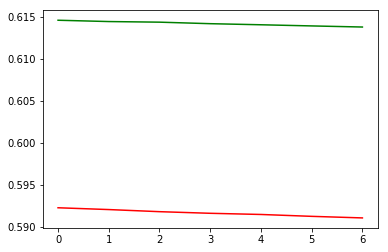

In [28]:
#ploting graph
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')

<h2>Conclusion</h2>
<p style="text-align:justify;text-justify:inter-word">After training our model the accuracy was found to be approximately 70 percent. The final accuracy tells that given a new data on a rookie stats, it will predict correctly 70% of the time whether the rookiee will have a 5-Year Career Longevity in NBA.</p>


In [54]:
loss,accuracy = model.evaluate(xtest,ytest)
print("Test Accuracy : ",accuracy*100,"%")

402/402 [==============================] - 0s 0us/step
Test Accuracy :  63.43283582089553 %


In [51]:
test = model.predict(xtrain[30:40])
test_prediction = []
for values in test:
    test_prediction.append(np.argmax(values))
test_prediction = np.array(test_prediction)
print("Actual Values    :",ytrain[30:40])
print("Predicted Values :",test_prediction)

Actual Values    : [1 0 1 0 1 1 1 0 0 1]
Predicted Values : [1 1 1 0 1 1 1 0 1 1]
